In [59]:
# Exploring the data 
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Step 2: Load dataset
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
print(df.median(numeric_only=True))# median explicitly

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [63]:
# Step 3 : Data Preprocessing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# 1.Drop unuseful coloumns  from dataset
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [67]:
# 2. We need to handle null values/missing values with median/ mode for age and Embarked
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df
#df.isnull().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [68]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0, 0.5, 'Count')

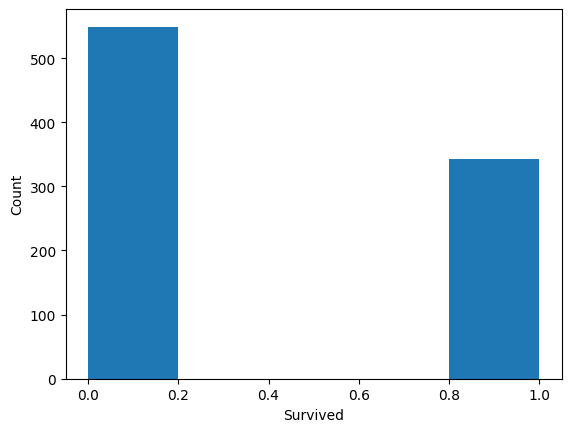

In [69]:
plt.hist(df["Survived"], bins=5)           # Histogram plot using matplotlib
plt.xlabel("Survived")
plt.ylabel("Count")

{'whiskers': [<matplotlib.lines.Line2D at 0x22ea18bcc20>,
 'caps': [<matplotlib.lines.Line2D at 0x22ea18bd130>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ea18bc950>],
 'medians': [<matplotlib.lines.Line2D at 0x22ea18bd6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ea18bd8e0>],
 'means': []}

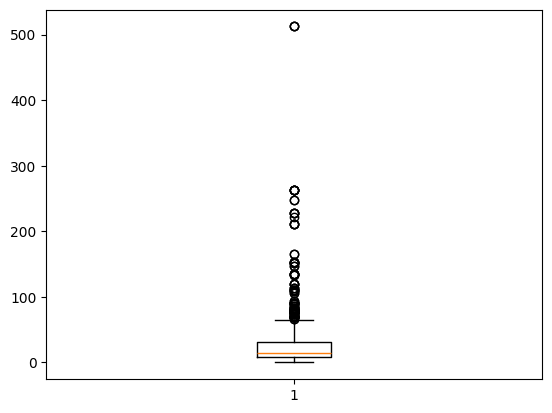

In [70]:
plt.boxplot(df["Fare"])        # Box plot using matplotlib

<Axes: xlabel='Sex', ylabel='count'>

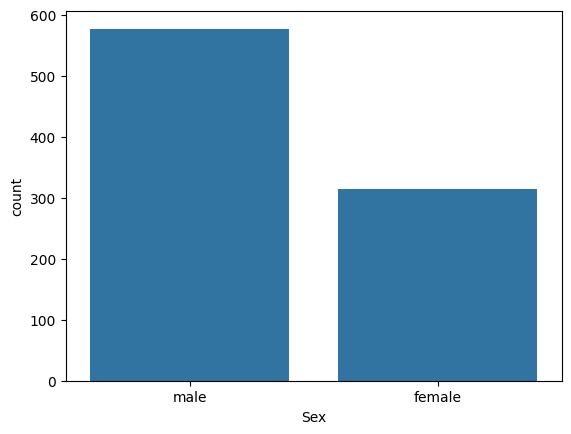

In [71]:
sns.countplot(df, x="Sex")

<Axes: xlabel='Age', ylabel='count'>

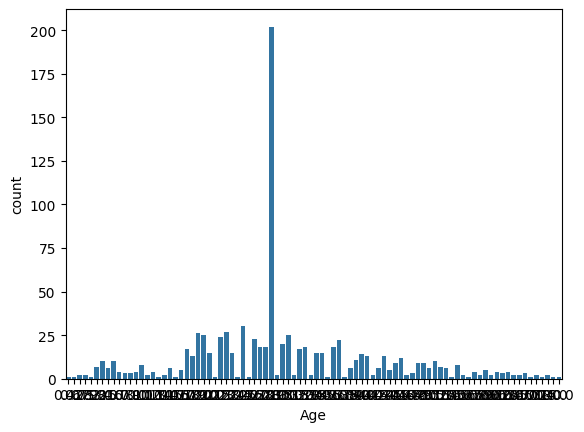

In [72]:
sns.countplot(df, x="Age")

<Axes: xlabel='Age', ylabel='Survived'>

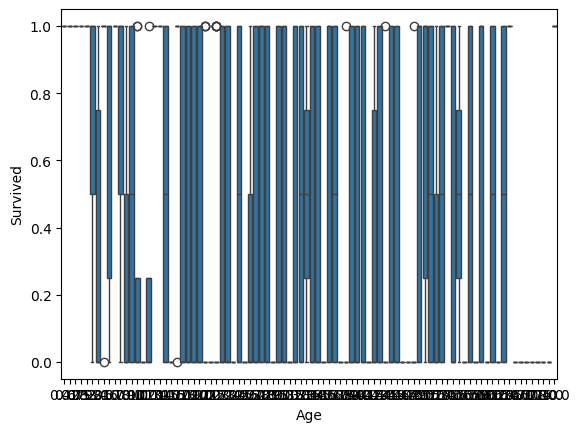

In [73]:
sns.boxplot(df, x="Age", y="Survived")

<Axes: xlabel='Sex', ylabel='Survived'>

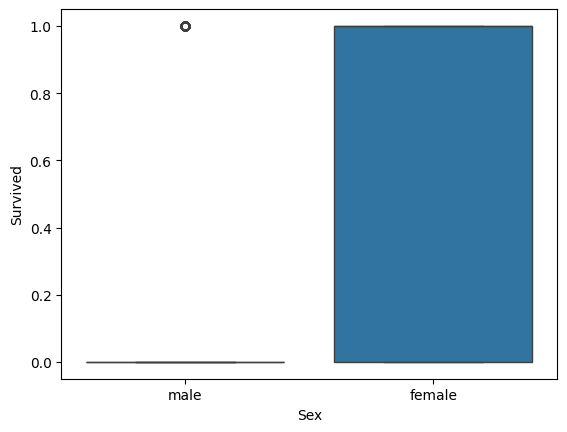

In [74]:
sns.boxplot(df, x="Sex", y="Survived")

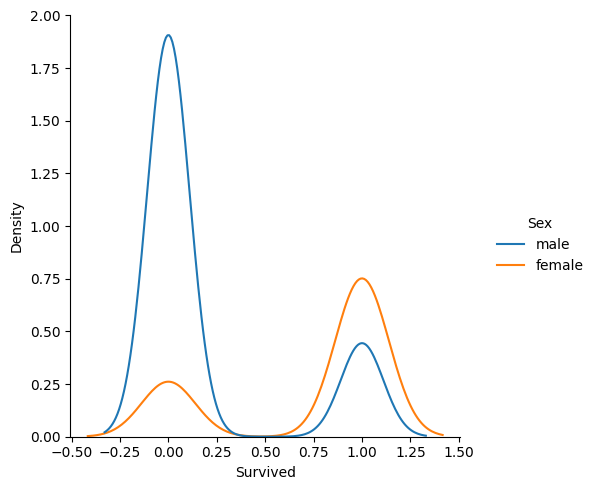

In [75]:
sns.displot(df, x= "Survived", hue="Sex", kind="kde")

<Axes: xlabel='Sex', ylabel='Survived'>

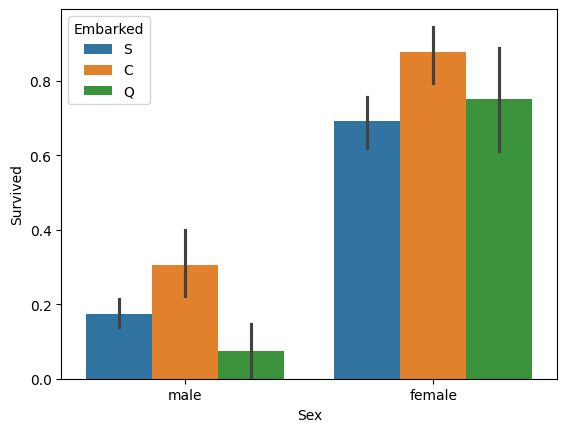

In [76]:
sns.barplot(df, x="Sex", y="Survived", hue="Embarked")

<Axes: xlabel='Age', ylabel='Survived'>

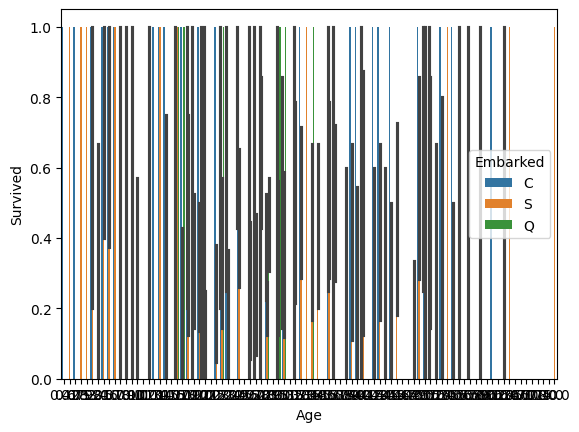

In [77]:
sns.barplot(df, x="Age", y="Survived", hue="Embarked")

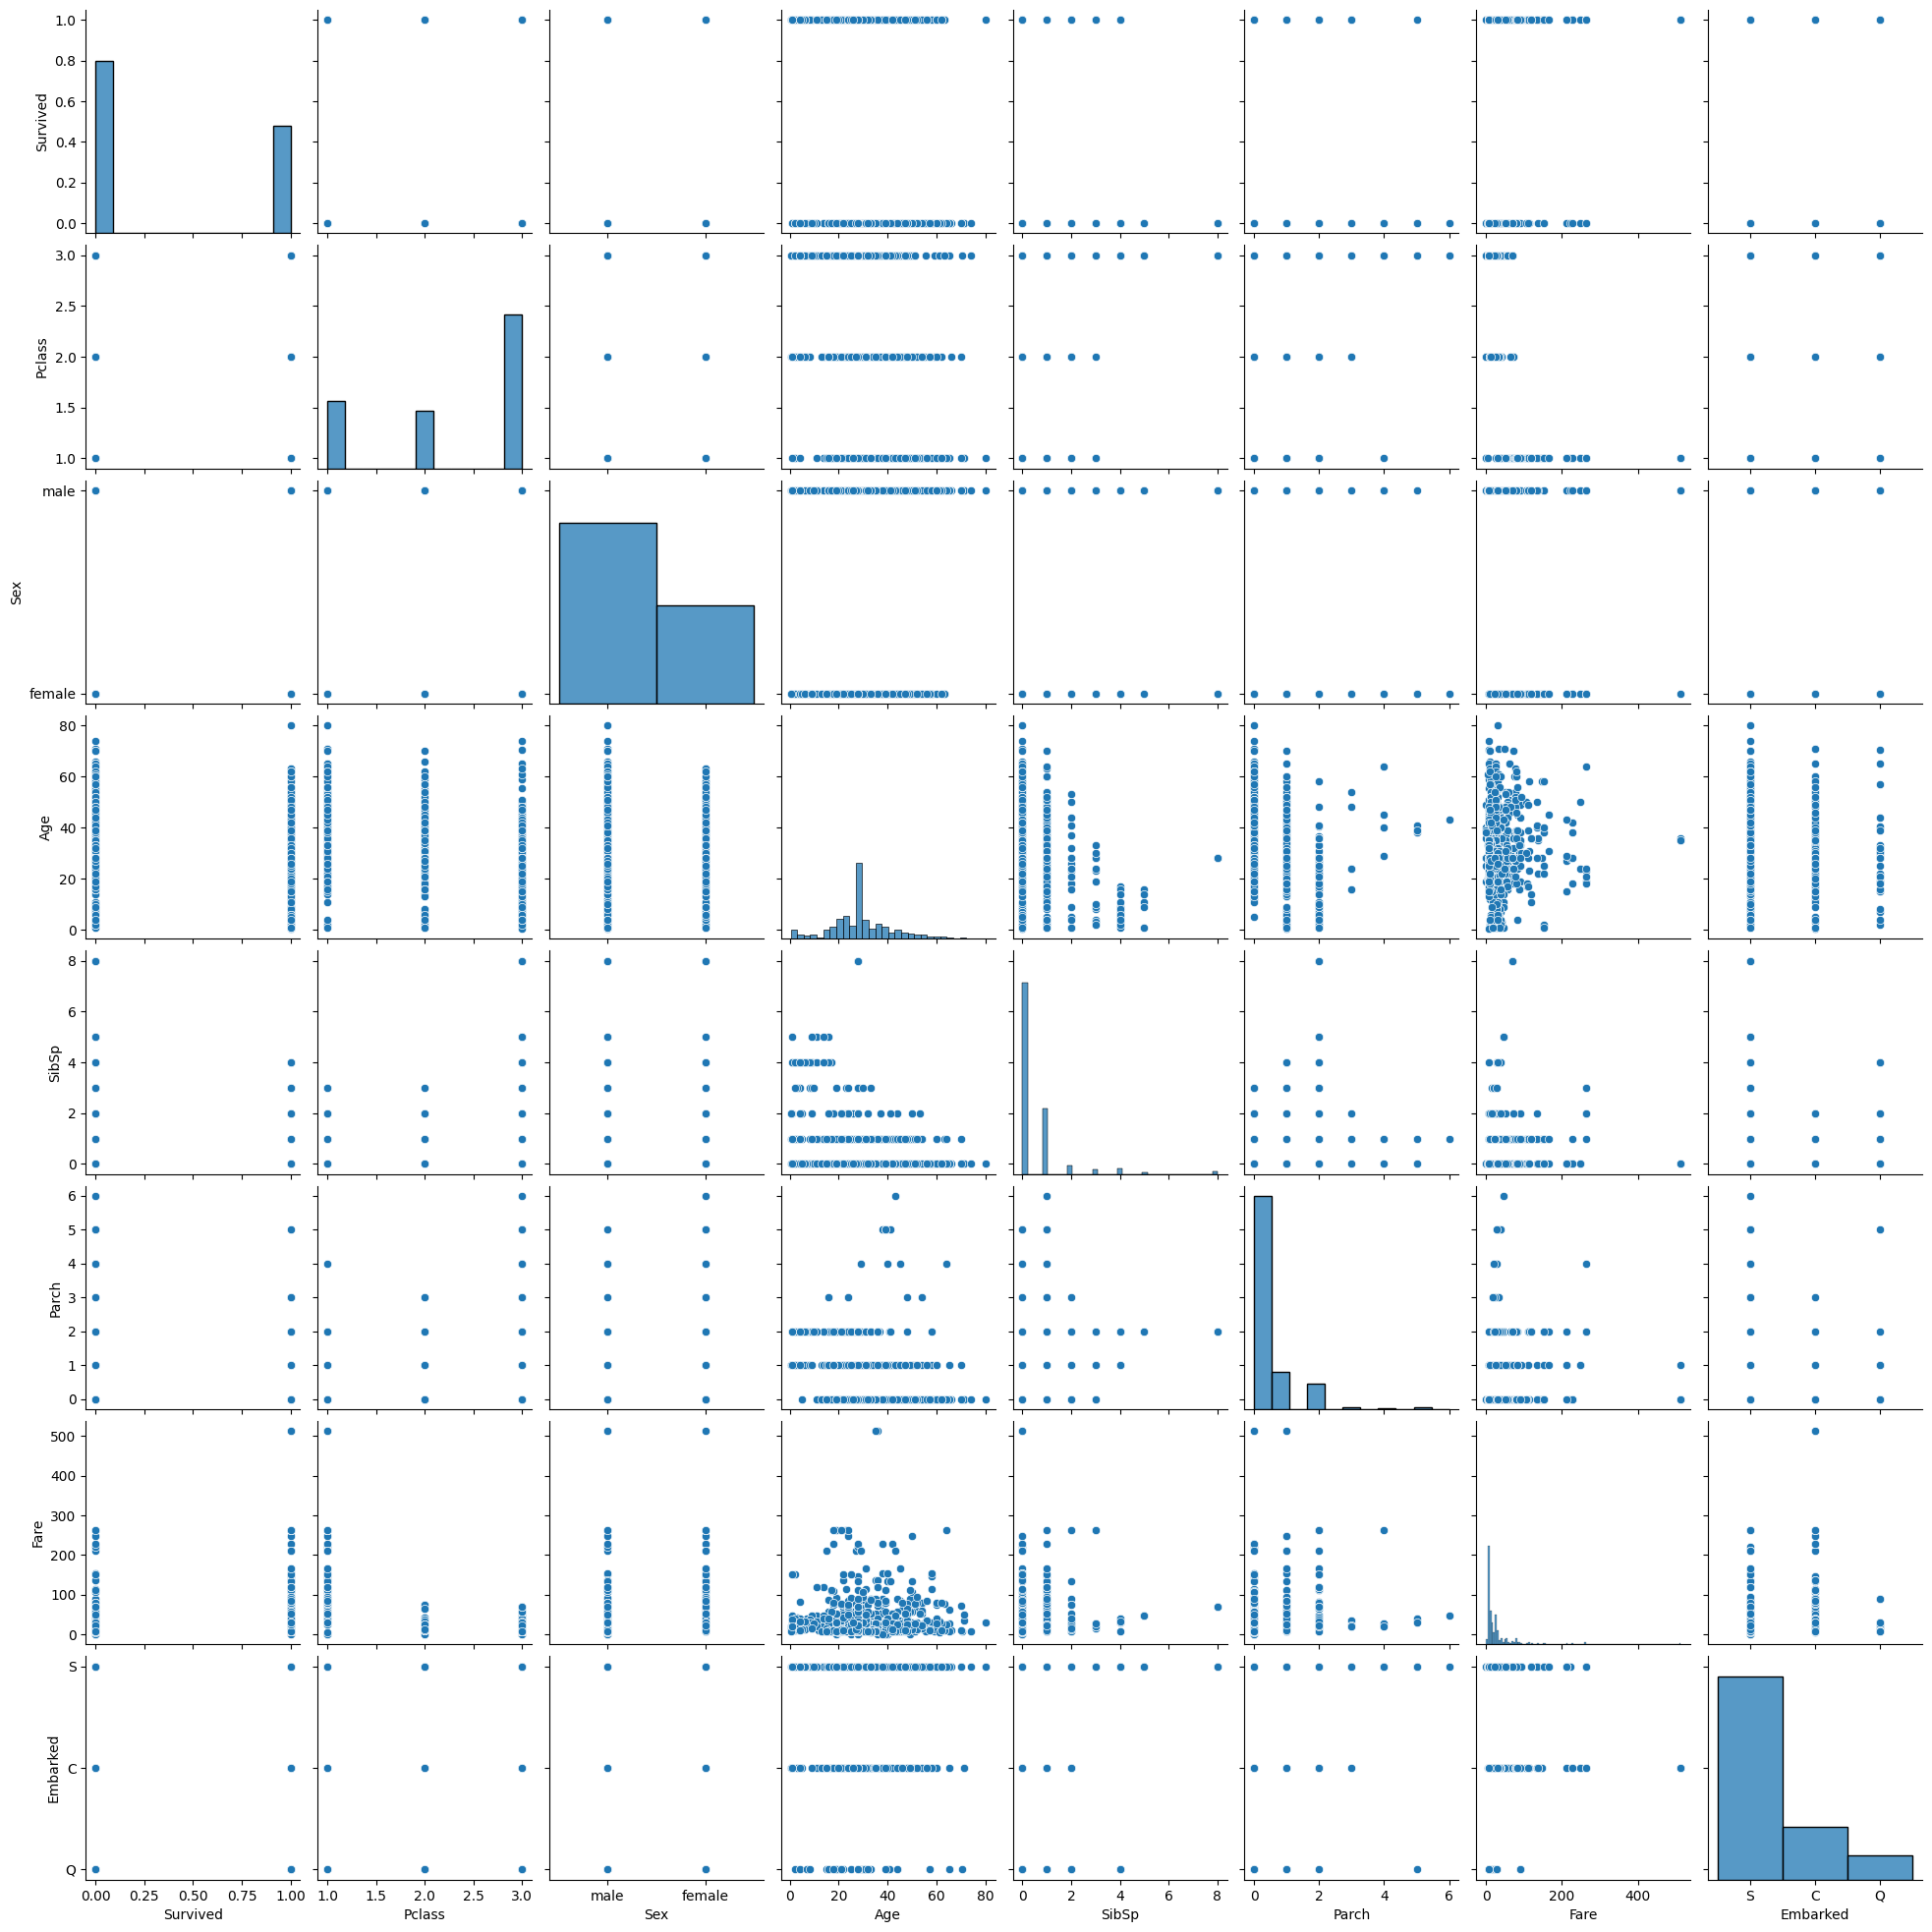

In [78]:
# we can analyse categorical and numerical variables of a data frame
sns.pairplot(df, vars=list(df.columns))

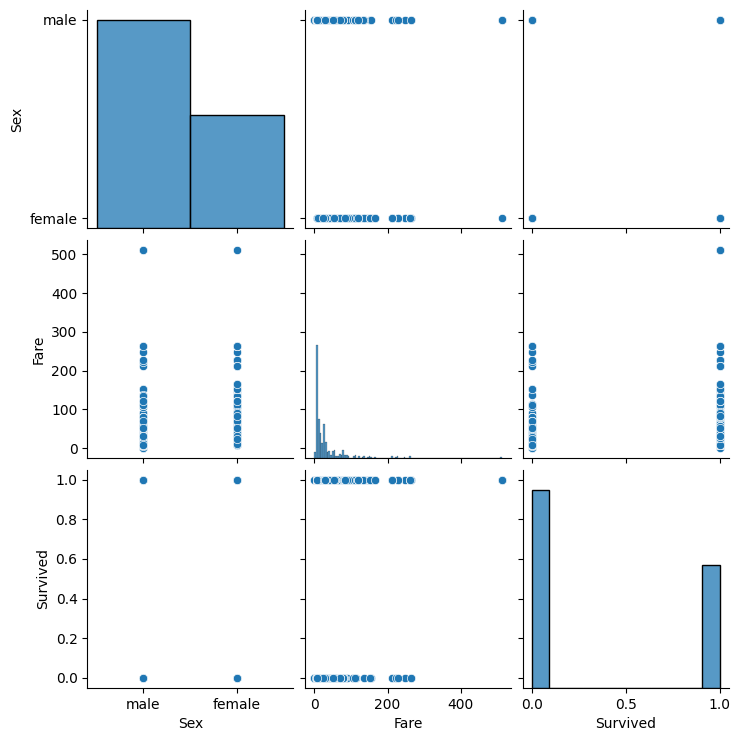

In [79]:
sns.pairplot(df, vars=['Sex', 'Fare', 'Survived'])

In [80]:
##3: Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])       # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<Axes: >

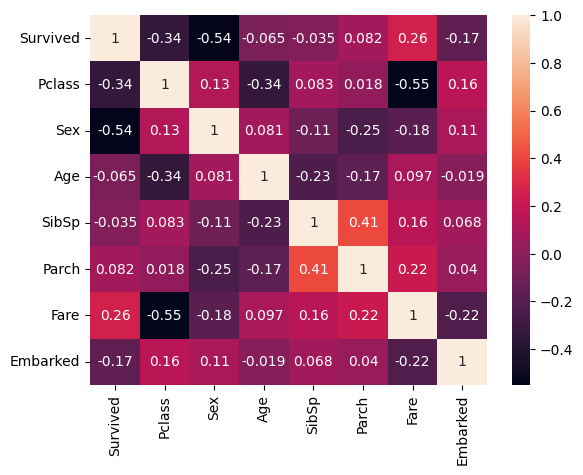

In [81]:
sns.heatmap(df.corr(), annot=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

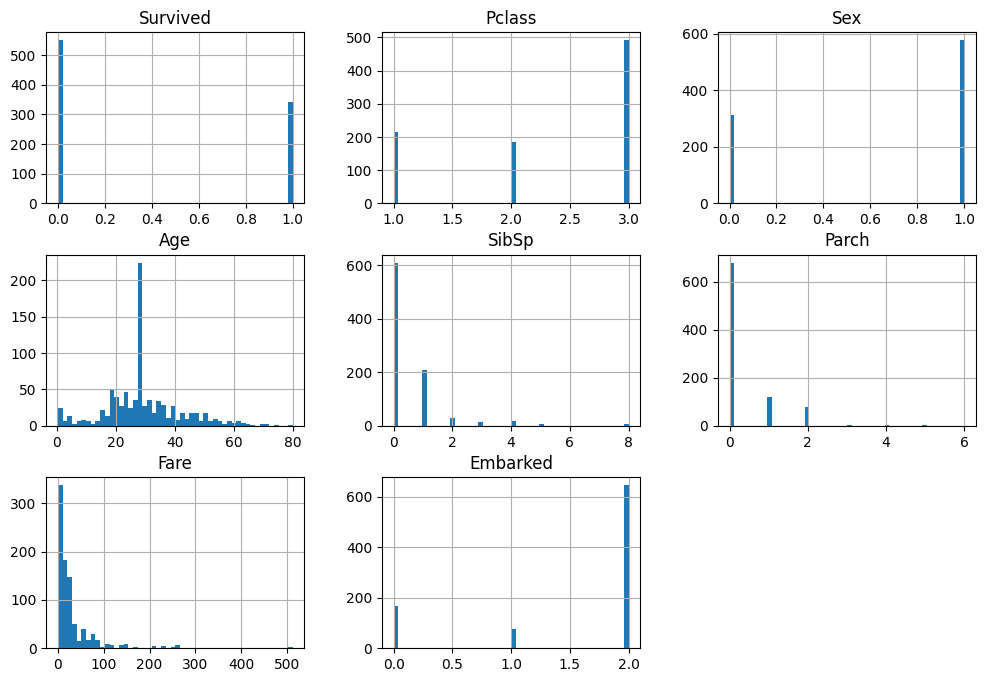

In [82]:
df.hist(bins=50, figsize=(12, 8))

In [84]:
numeric_cols = df.select_dtypes(include=['number']).columns # Histograms and Boxplots for Numeric Features

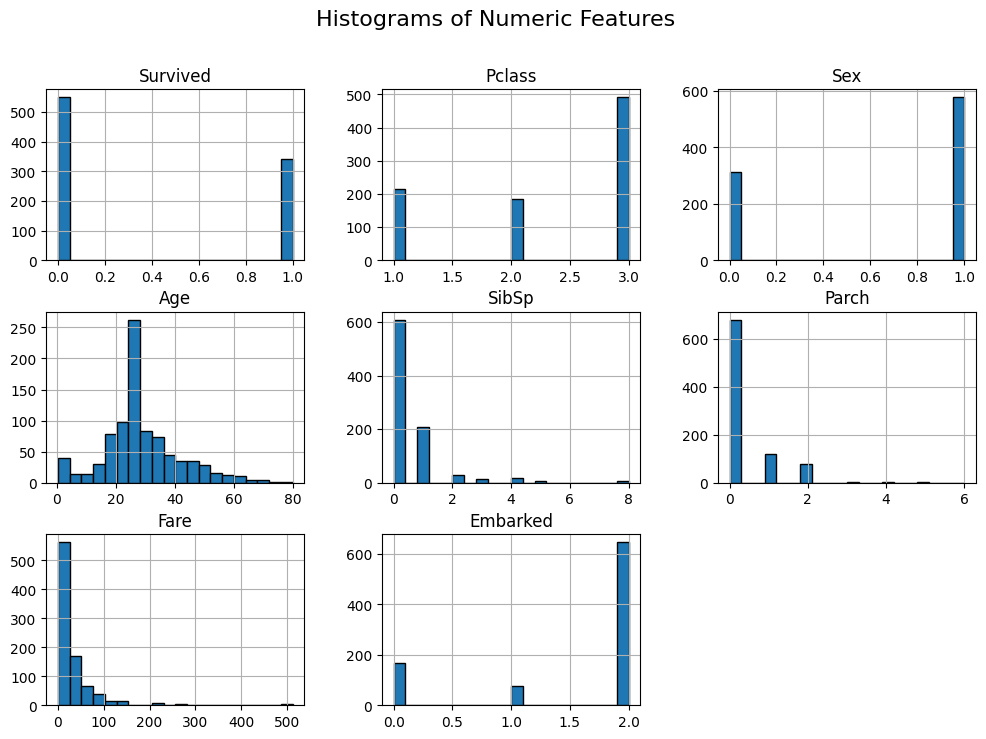

In [85]:
# Histograms
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

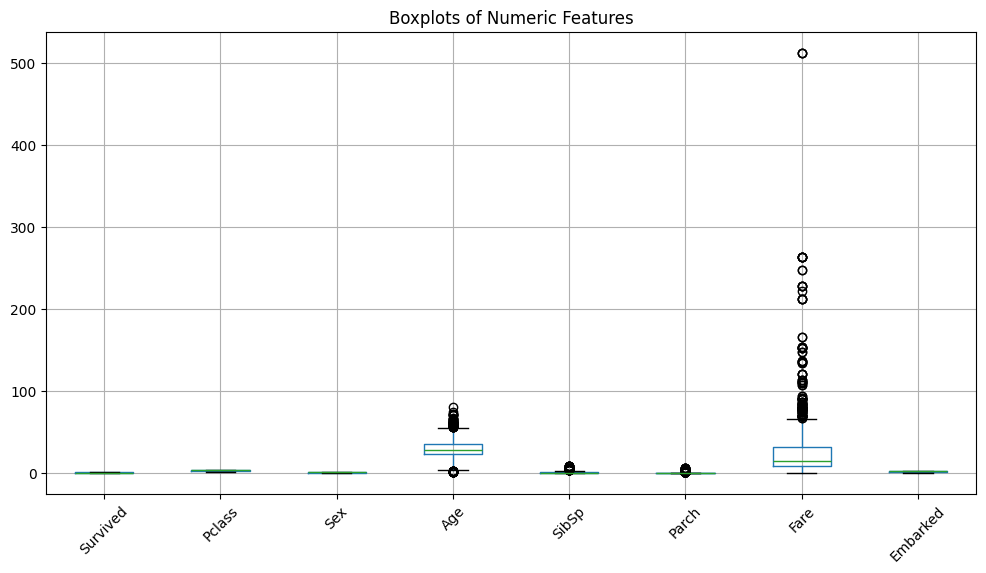

In [86]:
# Boxplots
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

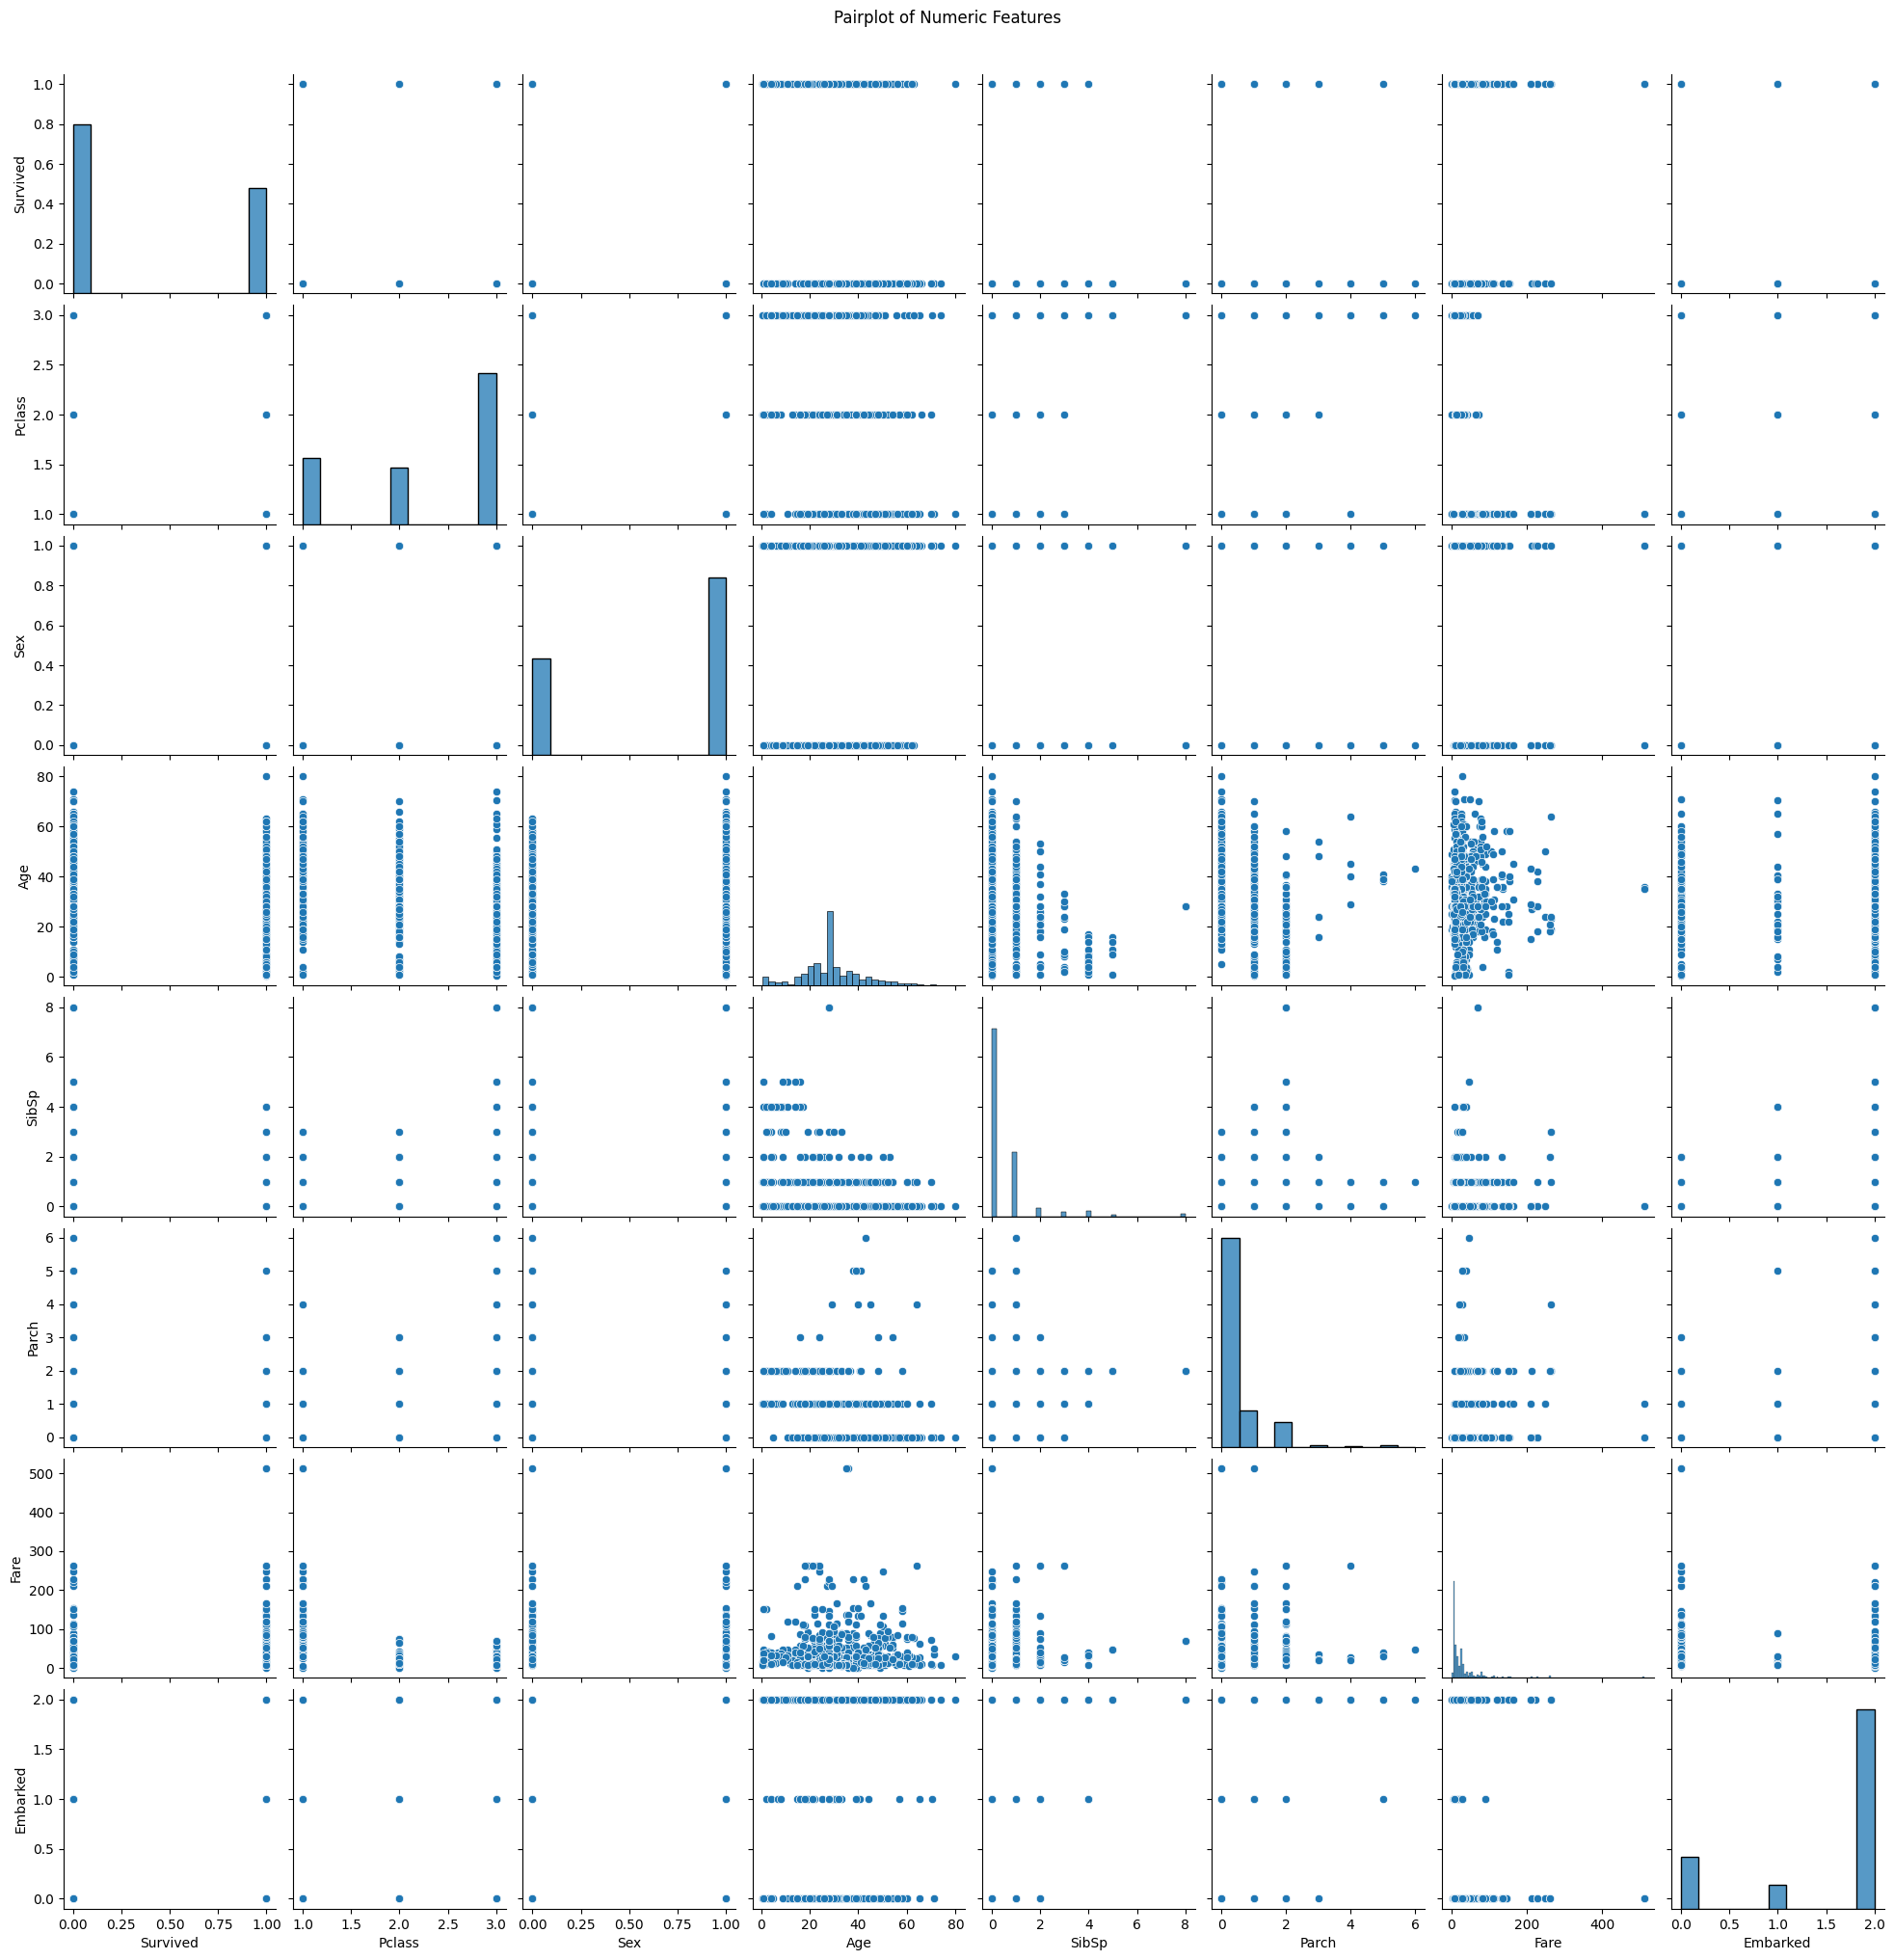

In [87]:
# Pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

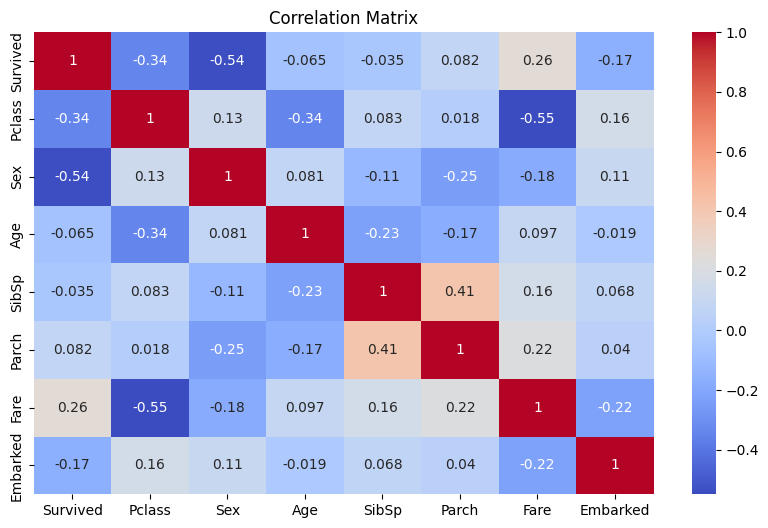

In [88]:
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [89]:
# 3. Identify Patterns, Trends, Anomalies
print("\n=== Skewness of Numeric Features ===")
print(df[numeric_cols].skew())


=== Skewness of Numeric Features ===
Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64


In [95]:
# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
#     print(f"{col}: {len(outliers)} potential outliers")

In [96]:
#   for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# print(f"Data shape after outlier removal: {df.shape}")

In [97]:
# 5. Basic Feature-Level Inferences (example)
# print("\n=== Observations ===")
# for col in numeric_cols:
#     print(f"{col}: mean={df[col].mean():.2f}, median={df[col].median():.2f}, std={df[col].std():.2f}")